Found 1606 files belonging to 2 classes.


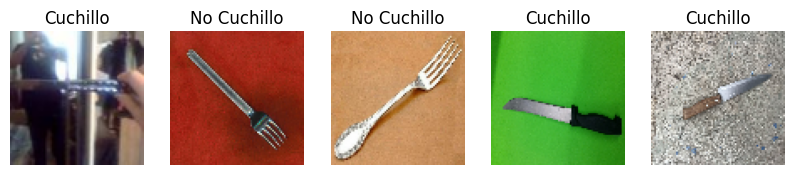

In [168]:
import matplotlib.pyplot as plt
import tensorflow as tf

dataset_dir = "knife_dataset++"

dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=(80, 80),
    batch_size=5,      
    shuffle=True,
)
for images, labels in dataset.take(1):
    # Mostrar imágenes como en TFDS
    plt.figure(figsize=(10, 10))
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("Cuchillo" if labels[i] == 0 else "No Cuchillo")
        plt.axis("off")
    plt.show()





In [169]:
#cantidad de imagenes en 
import os

URL = 'knife_dataset++/cuchillo'
print("hay:",len(os.listdir(URL))) 

URL = 'knife_dataset++/no_cuchillo'
print( "hay:",len(os.listdir(URL)))

hay: 795
hay: 811


In [170]:
import os
import cv2
import numpy as np

TAMANO_IMG = 80

ruta_dataset = "knife_dataset++"
categorias = ["cuchillo", "no_cuchillo"]

data_train = []

for etiqueta, categoria in enumerate(categorias):
    ruta_clase = os.path.join(ruta_dataset, categoria)

    for filename in os.listdir(ruta_clase):
        ruta_imagen = os.path.join(ruta_clase, filename)

        img = cv2.imread(ruta_imagen)
        if img is None:
            continue

        img = cv2.resize(img, (TAMANO_IMG, TAMANO_IMG))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        img = img.reshape(TAMANO_IMG, TAMANO_IMG, 1)
        
        data_train.append([img, etiqueta])


In [171]:
print(type(data_train[0]))
print(len(data_train[0]))
print(data_train[0][0].shape)
print(data_train[0][1])


<class 'list'>
2
(80, 80, 1)
0


In [172]:
len(data_train)

1606

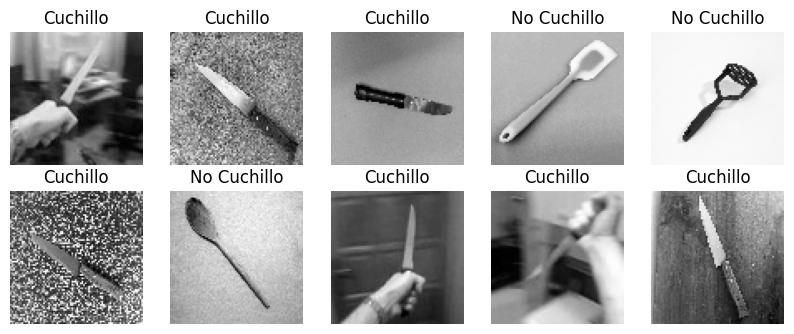

In [173]:
#mostrar como quedo las categorias aleatoriamente
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(10, 10))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    img, etiqueta = random.choice(data_train)
    plt.imshow(img.reshape(TAMANO_IMG, TAMANO_IMG), cmap='gray')
    plt.title("Cuchillo" if etiqueta == 0 else "No Cuchillo") 
    plt.axis("off")
plt.show()

In [174]:
X = [] #imgs de entrada(pixeles)
y = [] #label (cuchillo o no cuchillo)

for img, etiqueta in data_train:
    X.append(img)
    y.append(etiqueta)

In [175]:
X

[array([[[ 89],
         [ 92],
         [ 95],
         ...,
         [161],
         [166],
         [170]],
 
        [[ 91],
         [ 99],
         [109],
         ...,
         [177],
         [180],
         [182]],
 
        [[117],
         [126],
         [139],
         ...,
         [193],
         [196],
         [199]],
 
        ...,
 
        [[ 51],
         [ 60],
         [ 68],
         ...,
         [128],
         [135],
         [142]],
 
        [[ 60],
         [ 67],
         [ 70],
         ...,
         [121],
         [129],
         [136]],
 
        [[ 68],
         [ 72],
         [ 72],
         ...,
         [115],
         [123],
         [130]]], shape=(80, 80, 1), dtype=uint8),
 array([[[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],
 
        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],
 
        [[255],
         [255],
         [255],
 

In [176]:

import numpy as np
X = np.array(X).astype(float) / 255.0

In [177]:
X

array([[[[0.34901961],
         [0.36078431],
         [0.37254902],
         ...,
         [0.63137255],
         [0.65098039],
         [0.66666667]],

        [[0.35686275],
         [0.38823529],
         [0.42745098],
         ...,
         [0.69411765],
         [0.70588235],
         [0.71372549]],

        [[0.45882353],
         [0.49411765],
         [0.54509804],
         ...,
         [0.75686275],
         [0.76862745],
         [0.78039216]],

        ...,

        [[0.2       ],
         [0.23529412],
         [0.26666667],
         ...,
         [0.50196078],
         [0.52941176],
         [0.55686275]],

        [[0.23529412],
         [0.2627451 ],
         [0.2745098 ],
         ...,
         [0.4745098 ],
         [0.50588235],
         [0.53333333]],

        [[0.26666667],
         [0.28235294],
         [0.28235294],
         ...,
         [0.45098039],
         [0.48235294],
         [0.50980392]]],


       [[[1.        ],
         [1.        ],
         [1.  

In [178]:
y 

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [179]:
y = np.array(y)

In [180]:
X.shape

(1606, 80, 80, 1)

# Arquitectura e Hiperparametros

In [181]:
modelCNN = tf.keras.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(80, 80, 1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [182]:
modelCNN.compile(optimizer='adam',
                 loss= 'binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:

from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

early = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# div del dataset
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=42, shuffle=True
)

history=modelCNN.fit(X_train,
             y_train,
             batch_size=64,
             epochs=15,
             validation_data=(X_val, y_val),
             callbacks=[early])

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9238 - loss: 0.1880 - val_accuracy: 0.8589 - val_loss: 0.4027
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9267 - loss: 0.1680 - val_accuracy: 0.8672 - val_loss: 0.4228
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.9209 - loss: 0.1949 - val_accuracy: 0.8589 - val_loss: 0.4100
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9267 - loss: 0.1750 - val_accuracy: 0.8631 - val_loss: 0.3991
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9297 - loss: 0.1705 - val_accuracy: 0.8672 - val_loss: 0.4054
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9260 - loss: 0.1601 - val_accuracy: 0.8714 - val_loss: 0.4295
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9421 - loss: 0.1516 - val_accuracy: 0.8548 - val_loss: 0.4596


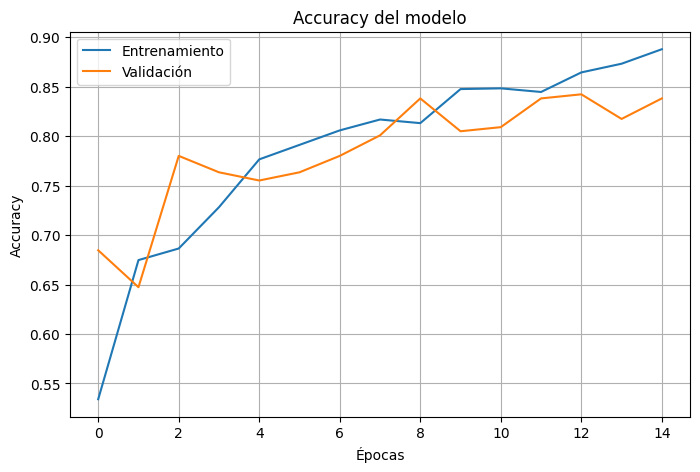

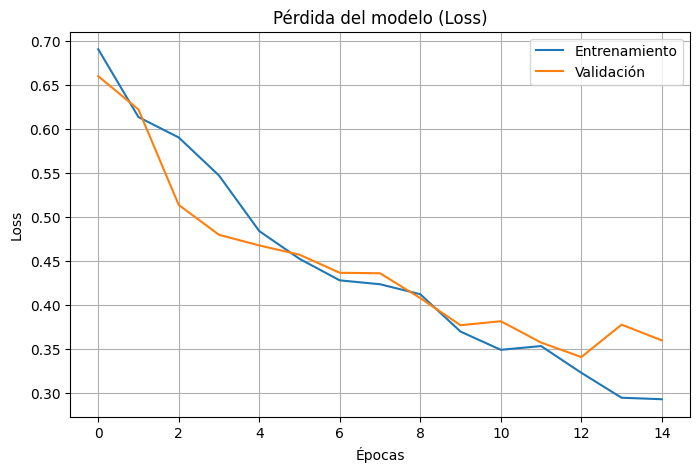

In [184]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Accuracy del modelo')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [192]:
modelCNN.save("modelo_cnn++.h5")

In [193]:
def test_random_image(modelo, cuchillo, no_cuchillo):
    todas = []

    for img in os.listdir(cuchillo):
        todas.append((os.path.join(cuchillo, img), 0))  # 0 = cuchillo

    for img in os.listdir(no_cuchillo):
        todas.append((os.path.join(no_cuchillo, img), 1))  # 1 = no cuchillo

    path_img, etiqueta_real = random.choice(todas)


    img = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (TAMANO_IMG, TAMANO_IMG))

    # Preparar para modelo
    input_modelo = img_resized.reshape(1, TAMANO_IMG, TAMANO_IMG, 1).astype("float32") / 255.0

    # Predicción
    prob_no = float(modelo.predict(input_modelo, verbose=0)[0][0])
    prob_si = 1.0 - prob_no

    # Mostrar imagen
    plt.imshow(img_resized, cmap='gray')
    plt.title(f"Imagen: {os.path.basename(path_img)}")
    plt.axis("off")
    plt.show()

    # Imprimir resultados
    
    print(f"Etiqueta real: {'CUCHILLO' if etiqueta_real == 1 else 'NO CUCHILLO'}")
    print(f"Prob NO cuchillo = {prob_no:.4f}")
    print(f"Prob SI cuchillo = {prob_si:.4f}")

    # Predicción final
    if prob_si > 0.5:
        print("Pred: ** CUCHILLO** ")
    else:
        print("Pred: ** NO CUCHILLO**")
    

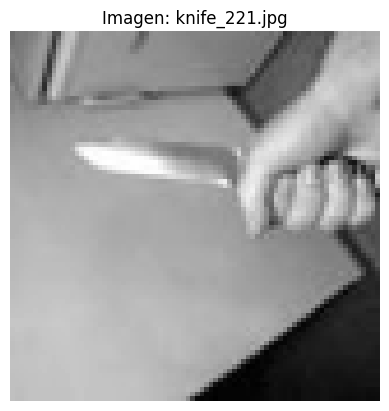

Etiqueta real: NO CUCHILLO
Prob NO cuchillo = 0.0023
Prob SI cuchillo = 0.9977
Pred: ** CUCHILLO** 


In [196]:
from tensorflow.keras.models import load_model
modelo = load_model("modelo_cnn++.h5")

test_random_image(
    modelo,
    cuchillo="knife_dataset++/cuchillo",
    no_cuchillo="knife_dataset++/no_cuchillo"
)